In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

import mne

# Dataset

[Link to OpenNeuro](https://openneuro.org/datasets/ds002725/versions/1.0.0)  
[Link to Paper](https://www.nature.com/articles/s41598-019-45105-2)  

**Recording**  

EEG was recorded via a 32 channel (31 channel EEG and 1 channel electrocardiogram) MRI-compatible BrainAmp MR and BrainCap MR EEG system (Brain Products Inc., Germany). EEG was recorded `at 5,000 Hz, without filtering` (an analogous approach to [60]), and with an amplitude resolution of 0.5uV. The reference electrode was placed at FCz. All electrodes were placed according to `the International 10/20 system`. Impedances were kept below 15kΩ throughout the experiments.

**Preprocessing**  

The imaging artefact was first attenuated using the Average Artefact Subtraction (AAS) method62, as implemented in Vision Analyzer software (BrainProducts). The ballisto-cardiogram artefact was also removed from the EEG via the AAS method. The cleaned EEG was then visually checked to confirm successful attenuation of the artefacts.

In [2]:
SUB_ID = '01'
GEN_ID = '01'
EXT_ROOT = ''
SAVE_PATH = 'preprocessing/data/'

In [3]:
# Parameters
SUB_ID = "03"
GEN_ID = "01"
EXT_ROOT = ""
SAVE_PATH = "./preprocessing\\data"


In [4]:
# FILE_PATH = 'data/openneuro/sub-01/eeg/sub-01_task-genMusic01_eeg.edf'
ROOT_PATH = f'data/openneuro/sub-{SUB_ID}/eeg'
RAW_FILE = f'sub-{SUB_ID}_task-genMusic{GEN_ID}_eeg.edf'
INFO_FILE = f'sub-{SUB_ID}_task-genMusic{GEN_ID}_channels.tsv'
raw = mne.io.read_raw_edf(os.path.join(EXT_ROOT, ROOT_PATH, RAW_FILE))

Extracting EDF parameters from D:\Code\BrainCodeCamp\Project\data\openneuro\sub-03\eeg\sub-03_task-genMusic01_eeg.edf...


EDF file detected


Setting channel info structure...


Creating raw.info structure...


C:\Users\Paul\AppData\Local\Temp\ipykernel_84764\4068081253.py:5: RuntimeWarning: Physical range is not defined in following channels:
ft_ghostvalence, ft_ghostarousal, sams_valence, sams_arousal, sams_valencert, sams_arousalrt, nback_stimuli, nback_keypress
  raw = mne.io.read_raw_edf(os.path.join(EXT_ROOT, ROOT_PATH, RAW_FILE))


In [5]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 46 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2020-04-17 08:48:33 UTC
 nchan: 47
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 4 items (dict)
>

# Channels Info

In [6]:
ch_info = pd.read_csv(os.path.join(ROOT_PATH, INFO_FILE), sep='\t')
ch_info

,name,type,units,status,status_description
0,FP1,EEG,microV,good,NaN
1,FP2,EEG,microV,good,NaN
2,F3,EEG,microV,good,NaN
3,F4,EEG,microV,good,NaN
4,C3,EEG,microV,good,NaN
5,C4,EEG,microV,good,NaN
6,P3,EEG,microV,good,NaN
7,P4,EEG,microV,good,NaN
8,O1,EEG,microV,good,NaN
9,O2,EEG,microV,good,NaN


In [7]:
ch_mapping = {
    'EEG': 'eeg',
    'ECG': 'ecg',
    'response': 'resp',
    'reponse': 'resp', # typo
    'stimuli': 'stim'
}
ch_types = dict(zip(raw.ch_names, ch_info['type'].apply(lambda x: ch_mapping[x])))
raw.set_channel_types(ch_types)

<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 892000 (892.0 s), ~41 kB, data not loaded>

# Basic Plotting

Using matplotlib as 2D backend.


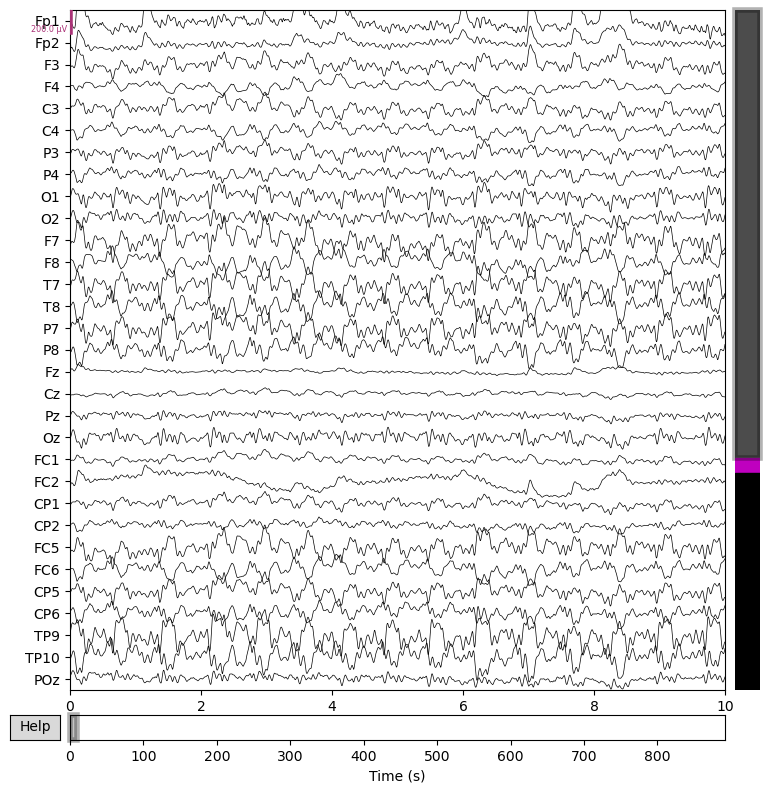

In [8]:
%matplotlib inline
_ = raw.plot(n_channels=31, scalings='1e-4')

In [9]:
montage_1020 = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage_1020, on_missing='ignore')  # ignore other channels

<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 892000 (892.0 s), ~54 kB, data not loaded>

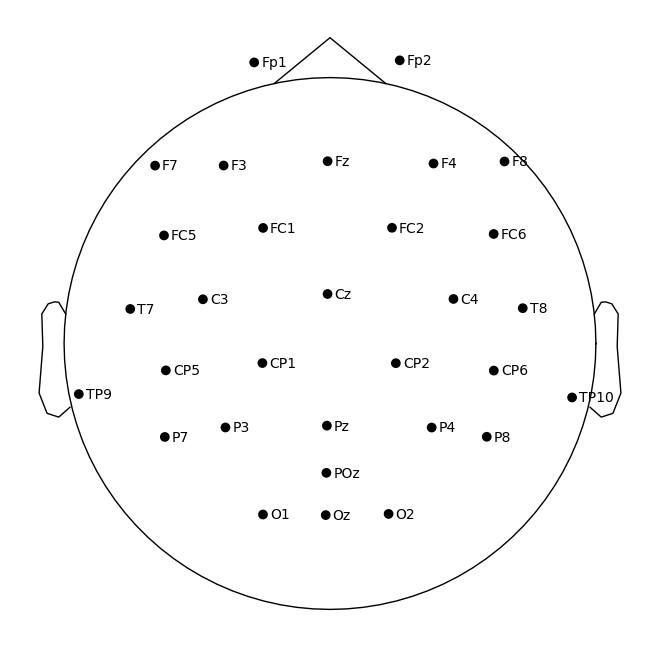

In [10]:
%matplotlib inline
_ = raw.plot_sensors(show_names=True)

# PSD

[Link to MNE](https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html)

In [11]:
data_channels = raw.ch_names[:31]

## Power line noise

Effective window size : 2.048 (s)


D:\Anaconda3\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


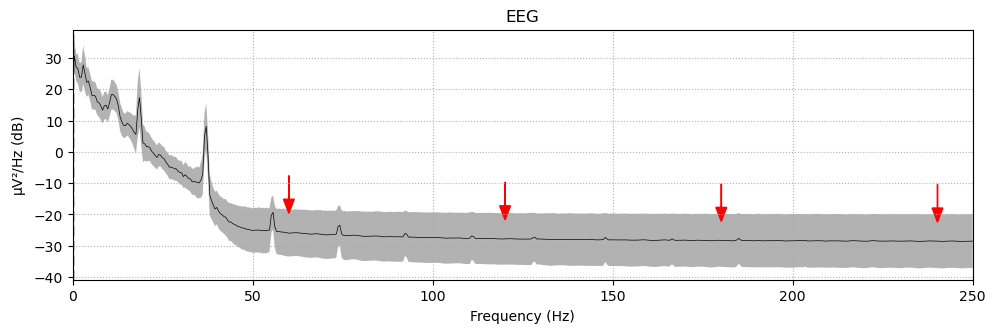

In [12]:
%matplotlib inline
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )

psd = raw.compute_psd(fmax=250).plot(average=True, picks="data", exclude="bads")
add_arrows(psd.axes[:2])

### TODO: Notch Filter

If figure above have peaks at power line's frequencies

## By Brain wavelength

In [13]:
# %matplotlib tk
# psd = raw.compute_psd(fmax=35, picks=data_channels)
# _ = psd.plot(picks='data')

Effective window size : 2.048 (s)


D:\Anaconda3\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


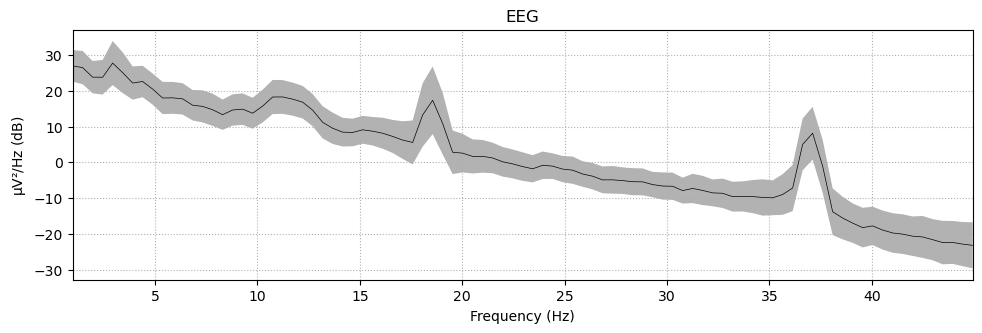

In [14]:
%matplotlib inline
psd = raw.compute_psd(fmin=0.5, fmax=45, picks=data_channels)
_ = psd.plot(picks='data', average=True)

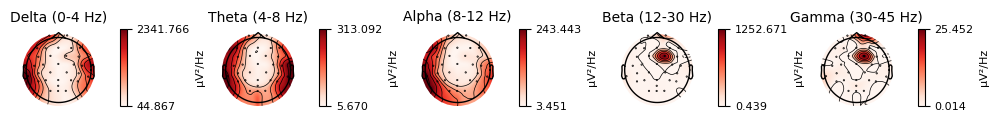

In [15]:
%matplotlib inline
_ = psd.plot_topomap()

# Preprocessing

[See Best Practices](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html#best-practices)

## Remove Bad Channels

In [16]:
assert len(raw.info['bads']) == 0
raw.info['bads']

[]

## Setting

In [17]:
current_sfreq = raw.info["sfreq"]
desired_sfreq = 512  # Hz
decim = np.round(current_sfreq / desired_sfreq).astype(int)
obtained_sfreq = current_sfreq / decim
lowpass_freq = obtained_sfreq / 3.0

## Low-pass filtering

In [18]:
raw_filtered = raw.load_data().copy().filter(l_freq=None, h_freq=lowpass_freq)

Reading 0 ... 891999  =      0.000 ...   891.999 secs...


Filtering raw data in 1 contiguous segment


Setting up low-pass filter at 1.7e+02 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal lowpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Upper passband edge: 166.67 Hz


- Upper transition bandwidth: 41.67 Hz (-6 dB cutoff frequency: 187.50 Hz)


- Filter length: 81 samples (0.081 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.2s finished


## Re-compute Music events

In [19]:
ch_music = raw_filtered.ch_names.index('music')
ch_info.iloc[ch_music].status_description

'The value of the music channel indicates which piece of music (from the stimuli folder) was played to the participant in a given trial. To convert from the values stored in this channel to the music channel: 1) multiply the value by 20, 2) convert to a string, 3) the file name is then constructed from the resulting 3-element number. For example, if the number is 282 this indicates file 2-8_2.wav from the stimuli folder.'

In [20]:
raw_filtered.apply_function(lambda x: np.round(x * 20 * 1e6).astype(int), picks='music')

<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 892000 (892.0 s), ~319.9 MB, data loaded>

In [21]:
events = mne.find_events(raw_filtered, stim_channel='music', consecutive=True)

13 events found


Event IDs: [ 63 283 389 751 752 753 821 822 823]


In [22]:
music_ids = list(set(events[:, 2]))
music_ids

[389, 751, 752, 753, 821, 822, 823, 283, 63]

In [23]:
music_root = 'data/openneuro/stimuli/generated'
music_files = list(map(lambda x: f'{x//100}-{x//10%10}_{x%10}.wav', music_ids))

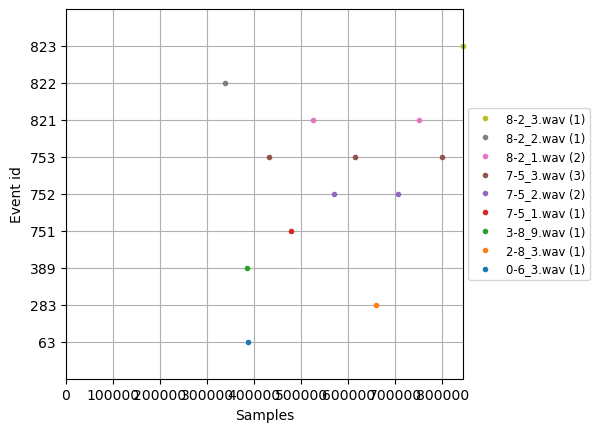

In [24]:
%matplotlib inline
_ = mne.viz.plot_events(events, event_id=dict(zip(music_files, music_ids)))

## Set Annotations

In [25]:
raw_filtered.annotations

<Annotations | 0 segments>

In [26]:
annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=dict(zip(music_ids, music_files)),
    sfreq=raw_filtered.info["sfreq"],
    orig_time=raw_filtered.info["meas_date"],
)
raw_filtered.set_annotations(annot_from_events)

<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 892000 (892.0 s), ~319.9 MB, data loaded>

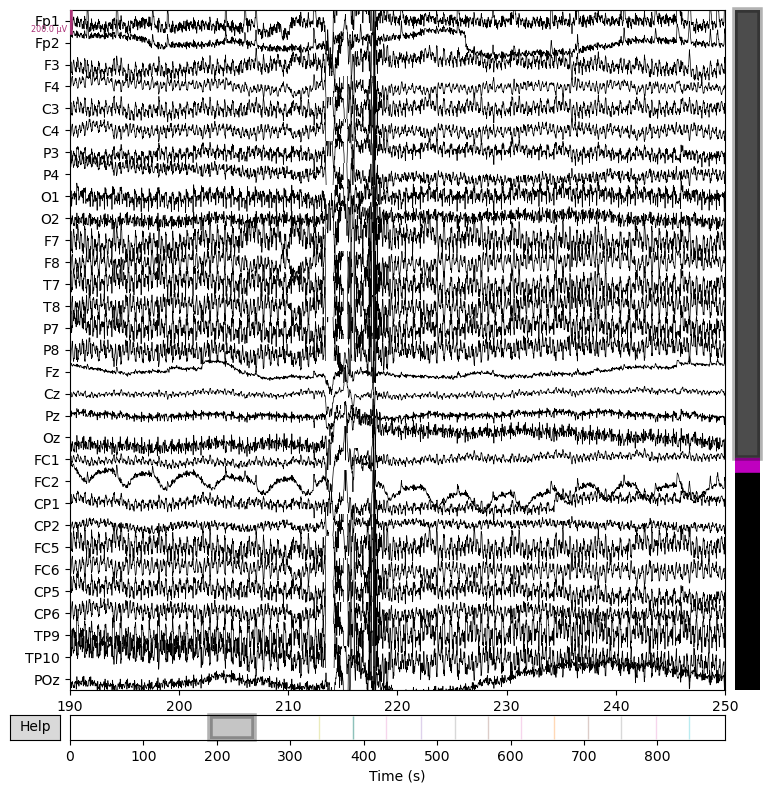

In [27]:
%matplotlib inline
_ = raw_filtered.plot(start=190, duration=60, n_channels=31, scalings='1e-4')

## Down-sampling

[About Sample Rate](https://www.researchgate.net/post/What_is_the_advantage_of_very_high_sampling_rates_in_EEG_systems)

In [28]:
raw_filtered.resample(desired_sfreq)
raw_filtered.set_eeg_reference()

12 events found


Event IDs: [283 389 751 752 753 821 822 823]


Trigger channel has a non-zero initial value of 1282 (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.


756 events found


Event IDs: [    9    46   265   767 34053]


12 events found


Event IDs: [283 389 751 752 753 821 822 823]


Trigger channel has a non-zero initial value of 1282 (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.


756 events found


Event IDs: [    9    46   265   767 34053]


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 456704 (892.0 s), ~163.8 MB, data loaded>

## Band Pass Filter

In [29]:
raw_filtered.filter(l_freq=0.5, h_freq=100) # 100 hz for ICA first

Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 1e+02 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 100.00 Hz


- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)


- Filter length: 3381 samples (6.604 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.3s finished


<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 456704 (892.0 s), ~163.8 MB, data loaded>

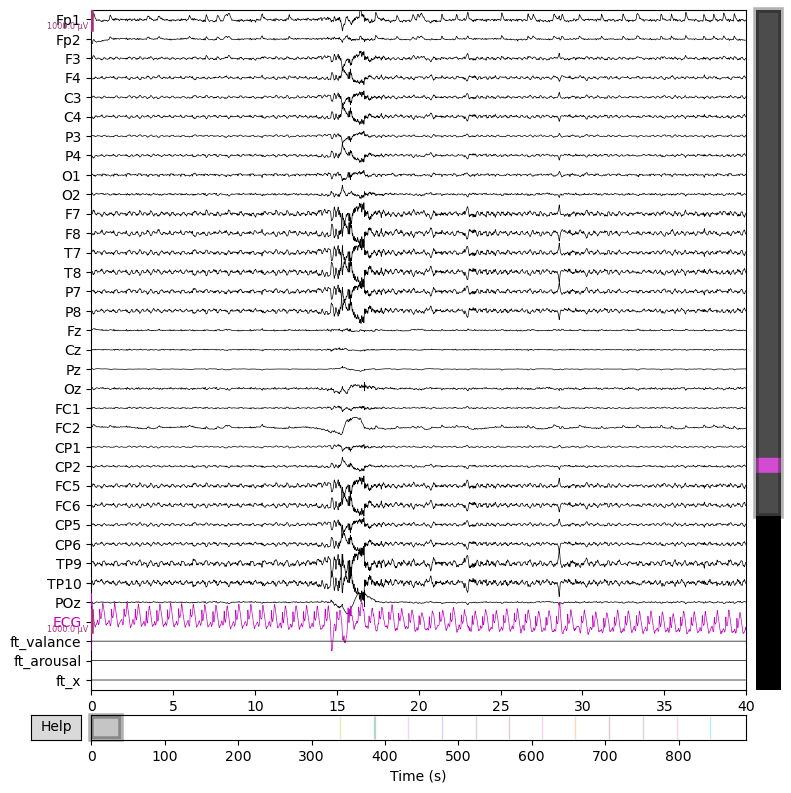

In [30]:
%matplotlib inline
_ = raw_filtered.plot(duration=40, n_channels=35, scalings='5e-4')

## Remove Artifact with ICA

In [31]:
ica = mne.preprocessing.ICA(
    n_components=15,
    max_iter="auto",
    method="infomax",
    random_state=42,
    fit_params=dict(extended=True),
)

In [32]:
ica.fit(raw_filtered, picks=data_channels)

Fitting ICA to data using 31 channels (please be patient, this may take a while)


Selecting by number: 15 components


Computing Extended Infomax ICA


Fitting ICA took 60.5s.


Method,infomax
Fit,500 iterations on raw data (456704 samples)
ICA components,15
Available PCA components,31
Channel types,eeg
ICA components marked for exclusion,—


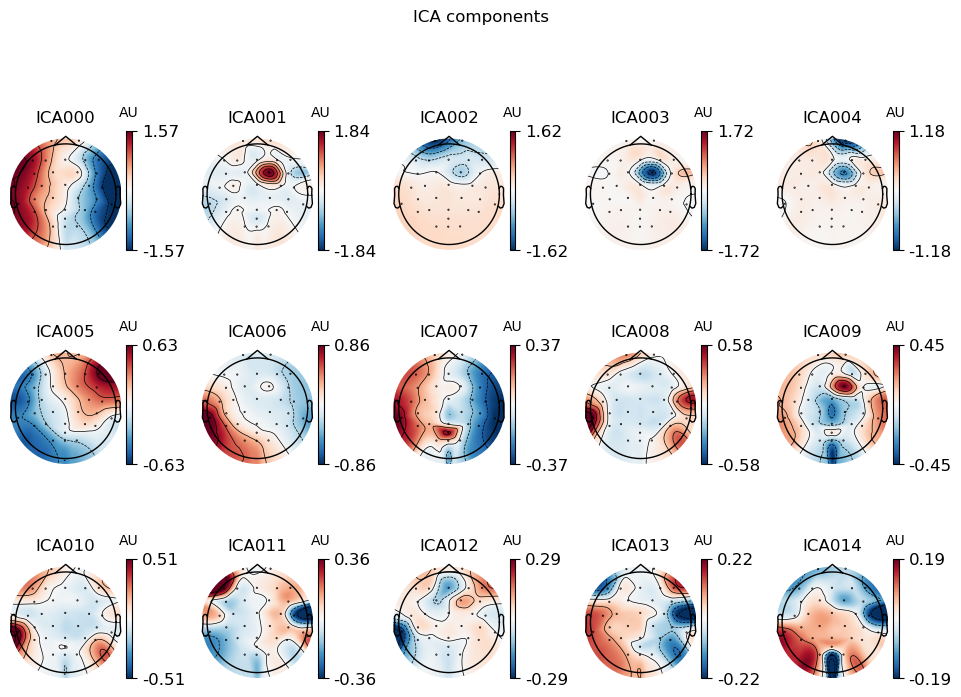

In [33]:
%matplotlib inline
_ = ica.plot_components(colorbar=True)

Creating RawArray with float64 data, n_channels=16, n_times=456704


    Range : 0 ... 456703 =      0.000 ...   891.998 secs


Ready.


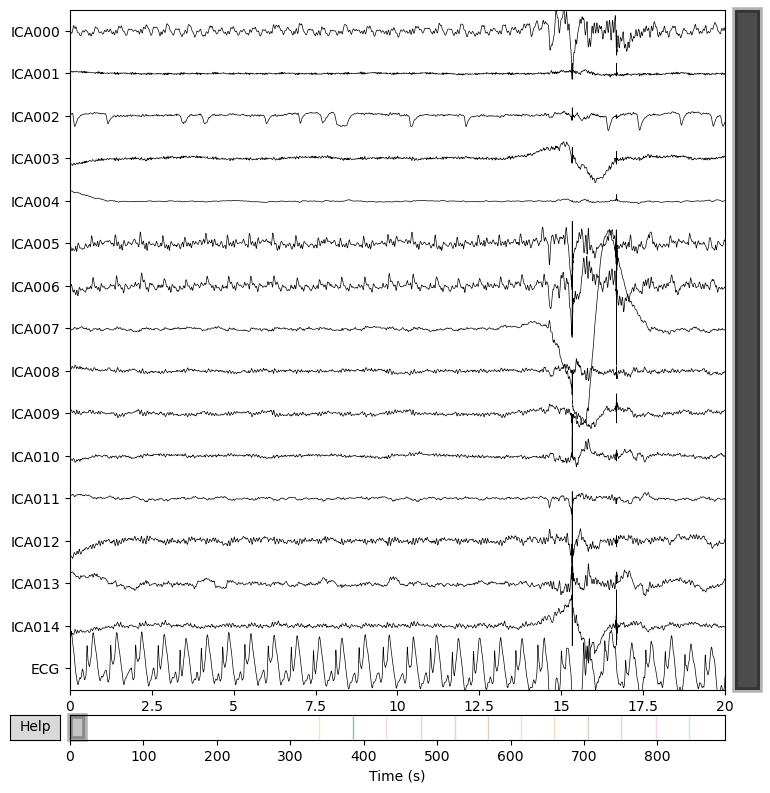

In [34]:
%matplotlib inline
_ = ica.plot_sources(raw_filtered)

### Manual Selection [🔗](https://labeling.ucsd.edu/tutorial/labels)

In [35]:
# %matplotlib inline
# _ = ica.plot_properties(raw_filtered, picks=[1], )

### ICA Classification [🔗](https://mne.tools/mne-icalabel/stable/auto_examples/iclabel_automatic_artifact_correction_ica.html)

In [36]:
from mne_icalabel import label_components

D:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [37]:
cls_components = label_components(raw_filtered, ica, method="iclabel")

C:\Users\Paul\AppData\Local\Temp\ipykernel_84764\2929520873.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  cls_components = label_components(raw_filtered, ica, method="iclabel")


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


#### Label Components

In [38]:
ICA_THRESHOLD = 0.9
REMOVE_BRAIN = False
REMOVE_MUSCLE = True
REMOVE_EOG = True
REMOVE_ECG = False
REMOVE_NOISE = True
REMOVE_OTHER = False
ica.exclude = []

##### Brain

In [39]:
for idx in ica.labels_['brain']:
    if REMOVE_BRAIN and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [40]:
%matplotlib inline
for pick in ica.labels_['brain']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### Muscle

In [41]:
for idx in ica.labels_['muscle']:
    if REMOVE_MUSCLE and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


446 matching events found


No baseline correction applied


0 projection items activated


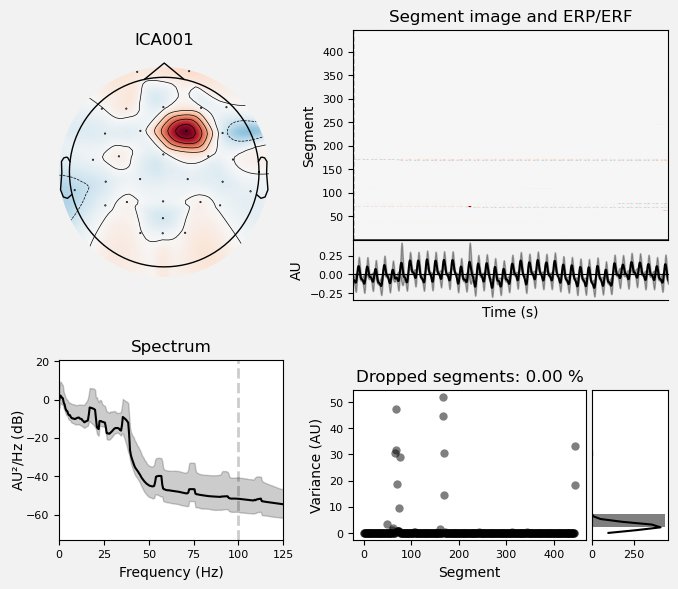

ICA001, Predict: muscle artifact (100.00%)
    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


446 matching events found


No baseline correction applied


0 projection items activated


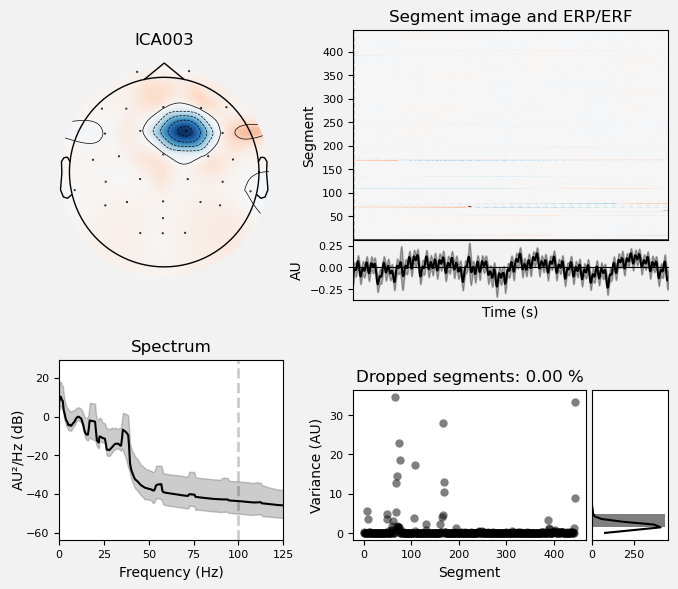

ICA003, Predict: muscle artifact (93.87%)
    Using multitaper spectrum estimation with 7 DPSS windows


Not setting metadata


446 matching events found


No baseline correction applied


0 projection items activated


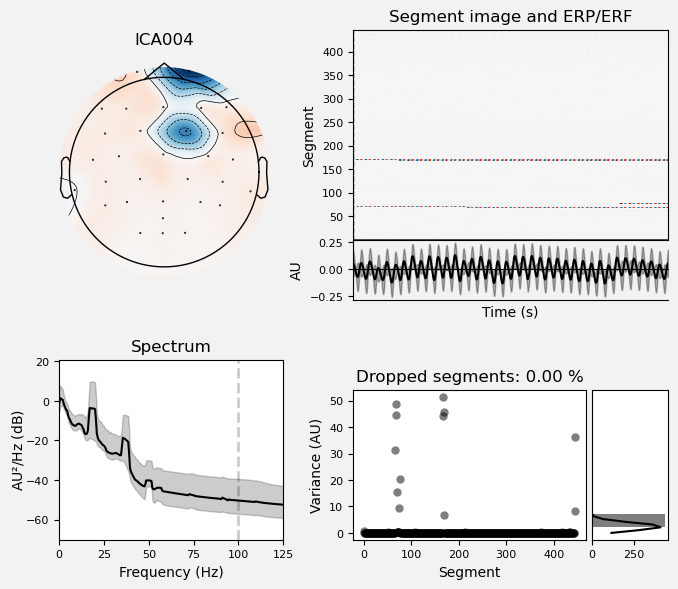

ICA004, Predict: muscle artifact (100.00%)


In [42]:
%matplotlib inline
for pick in ica.labels_['muscle']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### EOG (Eyes)

In [43]:
for idx in ica.labels_['eog']:
    if REMOVE_EOG and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [44]:
%matplotlib inline
for pick in ica.labels_['eog']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### ECG

In [45]:
for idx in ica.labels_['ecg']:
    if REMOVE_ECG and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [46]:
%matplotlib inline
for pick in ica.labels_['ecg']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### Line Noise

In [47]:
for idx in ica.labels_['line_noise']:
    if REMOVE_NOISE and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [48]:
%matplotlib inline
for pick in ica.labels_['line_noise']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### Channel Noise

In [49]:
for idx in ica.labels_['ch_noise']:
    if REMOVE_NOISE and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [50]:
%matplotlib inline
for pick in ica.labels_['ch_noise']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

##### Other

In [51]:
for idx in ica.labels_['other']:
    if REMOVE_OTHER and cls_components['y_pred_proba'][idx] > ICA_THRESHOLD:
        ica.exclude.append(idx)

In [52]:
%matplotlib inline
for pick in ica.labels_['other']:
    if pick in ica.exclude:
        _ = ica.plot_properties(raw_filtered, picks=[pick])
        print(f"ICA{pick:03d}, Predict: {cls_components['labels'][pick]} ({cls_components['y_pred_proba'][pick]*100:.2f}%)")

#### Remove Noise Channels

In [53]:
reconst_raw = raw_filtered.copy()
ica.apply(reconst_raw)
reconst_raw.filter(l_freq=0.5, h_freq=45)

Applying ICA to Raw instance


    Transforming to ICA space (15 components)


    Zeroing out 3 ICA components


    Projecting back using 31 PCA components


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 45 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 45.00 Hz


- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)


- Filter length: 3381 samples (6.604 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.3s finished


<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 456704 (892.0 s), ~163.8 MB, data loaded>

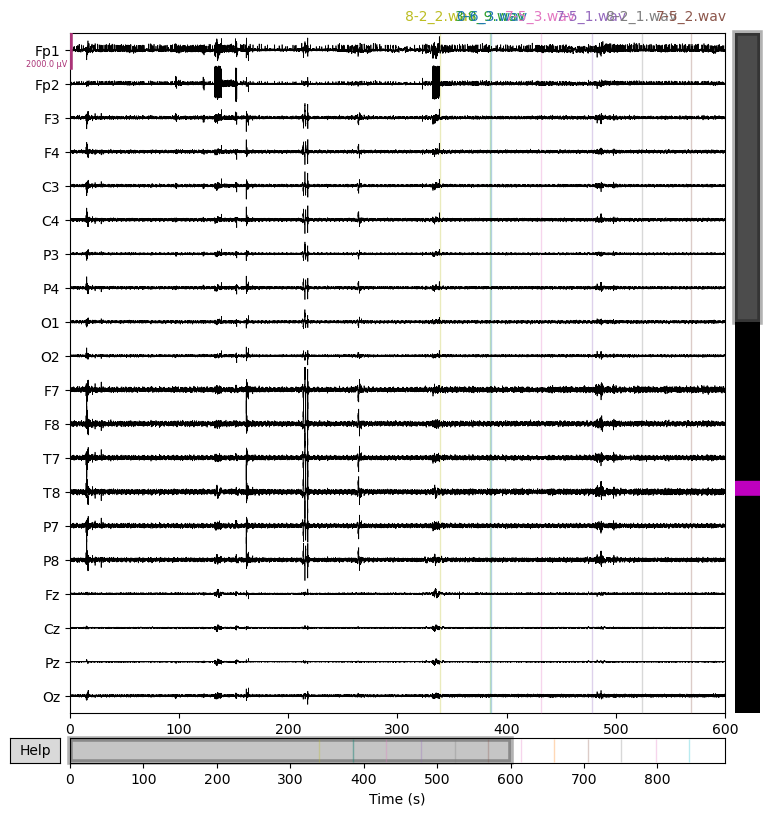

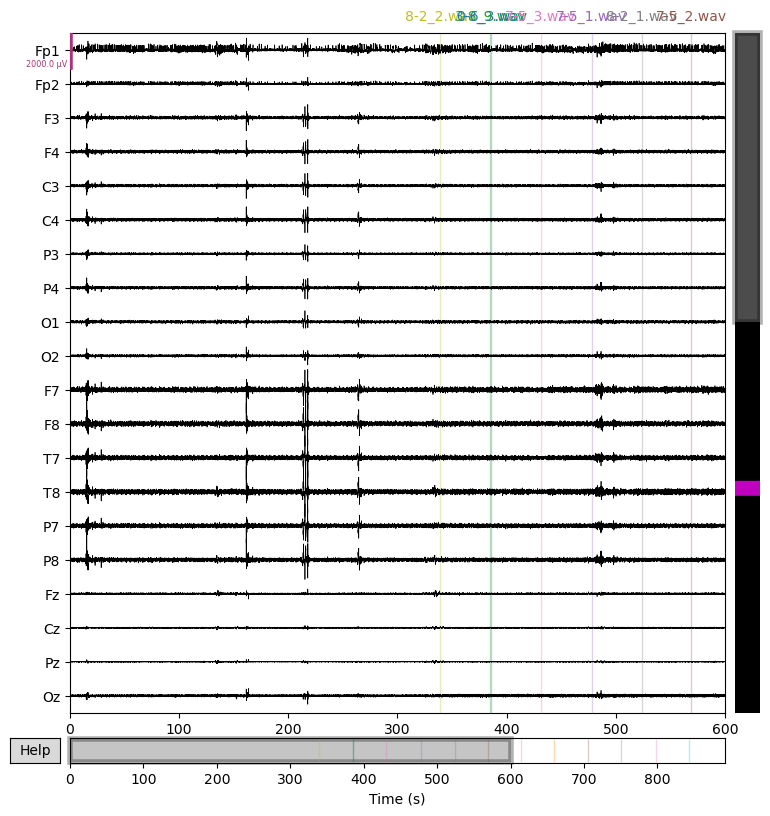

In [54]:
%matplotlib inline
_ = raw_filtered.plot(title='original', scalings='1e-3', duration=600)
_ = reconst_raw.plot(title='ICA', scalings='1e-3', duration=600)

### By EOG/ECG Channels [🔗](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#using-an-eog-channel-to-select-ica-components) (Not working, No EOG, Bad ECG)

##### EOG  
Since no EOG channel in the dataset, we skip this parts.

In [55]:
# eog_indices, eog_scores = ica.find_bads_eog(raw)
# ica.exclude += eog_indices

# # barplot of ICA component "EOG match" scores
# ica.plot_scores(eog_scores)

# # plot diagnostics
# ica.plot_properties(raw, picks=eog_indices)

# # plot ICs applied to raw data, with EOG matches highlighted
# ica.plot_sources(raw, show_scrollbars=False)

# # plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
# ica.plot_sources(eog_evoked)

##### ECG 🚩

In [56]:
# %matplotlib inline
# _ = raw_filtered.copy().pick('ecg').plot(n_channels=1, duration=60, start=120, scalings='5e-3')

Creating ECG epochs [🔗](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#visualizing-the-artifacts)

In [57]:
# %matplotlib inline
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw_filtered)
# ecg_epochs.plot_image(combine="mean")

In [58]:
# avg_ecg_epochs = ecg_epochs.copy().average().apply_baseline((None, 0))

In [59]:
# %matplotlib inline
# avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

In [60]:
# ecg_evoked = mne.preprocessing.create_ecg_epochs(raw_filtered).average()
# ecg_evoked.apply_baseline(baseline=(None, -0.2))
# ecg_evoked.plot_joint()

In [61]:
# # 'correlation' method uses ECG channel as reference.
# ecg_indices, ecg_scores = ica.find_bads_ecg(raw_filtered, method="correlation", threshold="auto")

In [62]:
# ica.exclude += ecg_indices

# # barplot of ICA component "ECG match" scores
# ica.plot_scores(ecg_scores)

# # plot diagnostics
# if len(ecg_indices) > 0:
#     ica.plot_properties(raw, picks=ecg_indices)
# else:
#     print('Not matching with ECG.')

# # plot ICs applied to raw data, with ECG matches highlighted
# ica.plot_sources(raw, show_scrollbars=False)

# # plot ICs applied to the averaged ECG epochs, with ECG matches highlighted
# ica.plot_sources(ecg_evoked)

# Save Result

In [63]:
reconst_raw.save(os.path.join(SAVE_PATH, f'ica_sub-{SUB_ID}_task-genMusic{GEN_ID}_eeg.fif'), overwrite=True)
reconst_raw

Overwriting existing file.


Writing D:\Code\BrainCodeCamp\Project\preprocessing\data\ica_sub-03_task-genMusic01_eeg.fif


Closing D:\Code\BrainCodeCamp\Project\preprocessing\data\ica_sub-03_task-genMusic01_eeg.fif


[done]


<RawEDF | sub-03_task-genMusic01_eeg.edf, 47 x 456704 (892.0 s), ~163.8 MB, data loaded>